# Predicción de ventas futuras
### Daniel Marín López
---
### Problema

Predecir las ventas futuras de un producto ayuda a una empresa a gestionar el coste de fabricación y publicidad del producto.

El conjunto de datos que se proporciona trata sobre el gasto publicitario en el que incurre una empresa en varias plataformas publicitarias. Las columnas del conjunto de datos son:

* TV:  Costo de publicidad gastado en dólares para publicidad en TV.
* Radio:  Costo de publicidad gastado en dólares para publicidad en Radio.
* Periódico:  Costo de publicidad gastado en dólares para publicidad en periódico.
* Ventas:  Número de unidades vendidas.

Entonces, en el conjunto de datos anterior, las ventas del producto dependen del costo de la publicidad del producto.

Crea un modelo usando regresión lineal (aunque no sabemos si la relación es lineal o polinómica) y otro usando random forest.Visualización los datos, haz el preprocesamiento y crea el modelo. siguiendo las pautas vistas en clase.

---

In [ ]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import graphviz
from sklearn import tree
from IPython.display import Image

Definimos variables globales y algunas funciones que nos ayudaran en la visualización de los datos.

In [ ]:
SEED = 42
TEST_SIZE = 0.2
FIG_SIZE = (10, 6)
FONT_SIZE = 14

def draw_data(x, y, xlabel, ylabel, title):
  plt.figure(figsize=FIG_SIZE)
  sns.scatterplot(x=x, y=y)
  plt.xlabel(xlabel, fontsize=FONT_SIZE)
  plt.ylabel(ylabel, rotation=90, fontsize=FONT_SIZE)
  plt.title(title)
  plt.show()

def draw_predictions(x, y, y_pred, xlabel, ylabel, title):
  plt.figure(figsize=FIG_SIZE)
  sns.scatterplot(x=x, y=y)
  sns.lineplot(x=x, y=y_pred, color='red')
  plt.xlabel(xlabel, fontsize=FONT_SIZE)
  plt.ylabel(ylabel, rotation=90, fontsize=FONT_SIZE)
  plt.title(title)
  plt.show()

Descargamos y visualizamos los datos.

In [ ]:
!wget https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv

--2025-03-30 09:04:57--  https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4062 (4.0K) [text/plain]
Saving to: ‘advertising.csv’

advertising.csv     100%[===================>]   3.97K  --.-KB/s    in 0s      

2025-03-30 09:04:57 (44.3 MB/s) - ‘advertising.csv’ saved [4062/4062]



In [ ]:
advertising = pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Vamos a ver si nuestro conjunto de datos tiene valores nulos.

In [ ]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Observamos que no hay valores nulos, lo que nos facilita el trabajo un poco. Veamos la matriz de confusión.

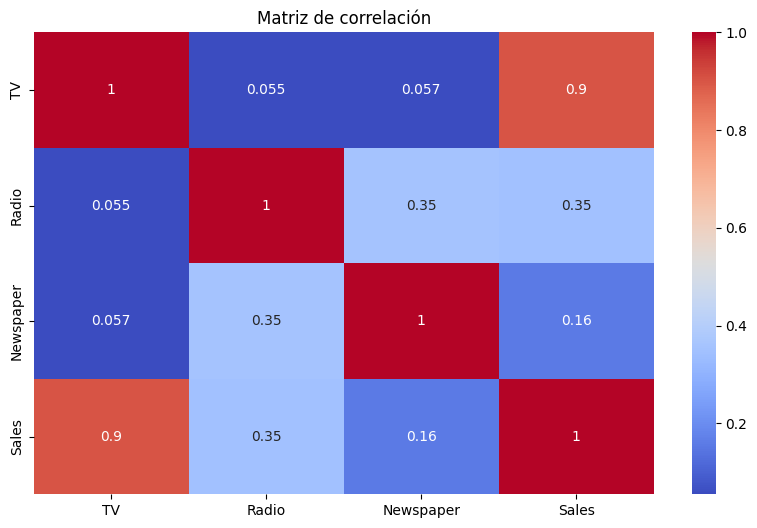

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(advertising.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

De todas las características, solo la **publicidad de Televisión** es la que tiene una gran correlación con las **ventas**. Por lo que solo usaremos estas dos. Veamos como se representas los datos en la gráfica.

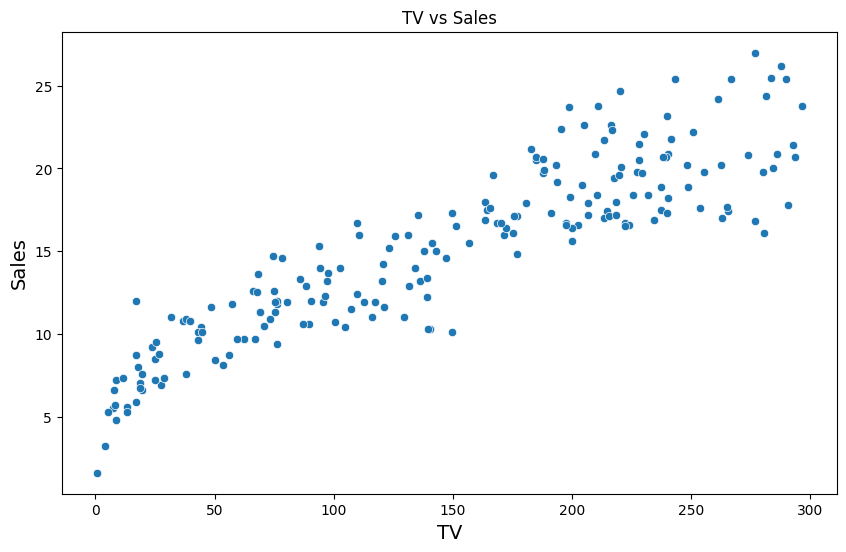

In [ ]:
draw_data(advertising['TV'], advertising['Sales'], 'TV', 'Sales', 'TV vs Sales')

Vemos que los datos se agrupan formando una curva, por lo que tendremos que ajustar nuestro modelo para que traze la curva. Creamos datos de entrenamiento y test.

In [ ]:
X = advertising['TV']
y = advertising['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)

Estandarizamos los datos con `StandardScaler`.

In [ ]:
adv_standar = StandardScaler()
X_train_s = adv_standar.fit_transform(X_train.values.reshape(-1, 1))
X_test_s = adv_standar.transform(X_test.values.reshape(-1, 1))

Visualizamos la gráfica de los datos de entrenamiento.

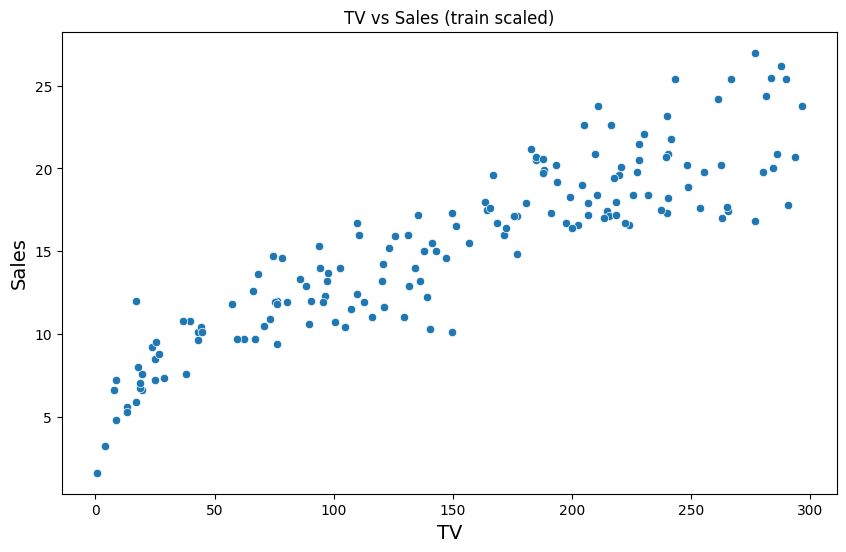

In [ ]:
draw_data(X_train, y_train, 'TV', 'Sales', 'TV vs Sales (train scaled)')

Vemos que se mantiene la curva, por lo que para que nuestro modelo siga la curva de los datos agregaremos una nueva característica con los valores $x^2$.

In [ ]:
X_train_2 = np.column_stack((X_train_s, X_train_s**2))

model_reg = LinearRegression()
model_reg.fit(X_train_2.reshape(-1, 2), y_train)

LinearRegression()

Hacemos la predicción y escribimos la ecuación correspondiente de nuestro modelo. Además representamos el MSE, RMSE Y R2.

In [ ]:
X_test_2 = np.column_stack((X_test_s, X_test_s**2))
y_pred = model_reg.predict(X_test_2.reshape(-1, 2))

print('Coeficiente 1: ', model_reg.coef_[0])
print('Coeficiente 2: ', model_reg.coef_[1])
print('Intercepto: ', model_reg.intercept_)
print(f'Polinomio y = {round(model_reg.intercept_, 2)} + {round(model_reg.coef_[0], 2)}x^2 + {round(model_reg.coef_[1], 2)}x')
print('='*35)
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', root_mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Coeficiente 1:  4.6179908924574535
Coeficiente 2:  -0.5491765876775778
Intercepto:  15.87980158767758
Polinomio y = 15.88 + 4.62x^2 + -0.55x
MSE: 5.68289119139824
RMSE: 2.38388153887693
R2: 0.8160942105168346


Vemos que el R2 es de un 81.61%. Los que es bastante bueno, por último representaremos nuetra predicción en la gráfica.

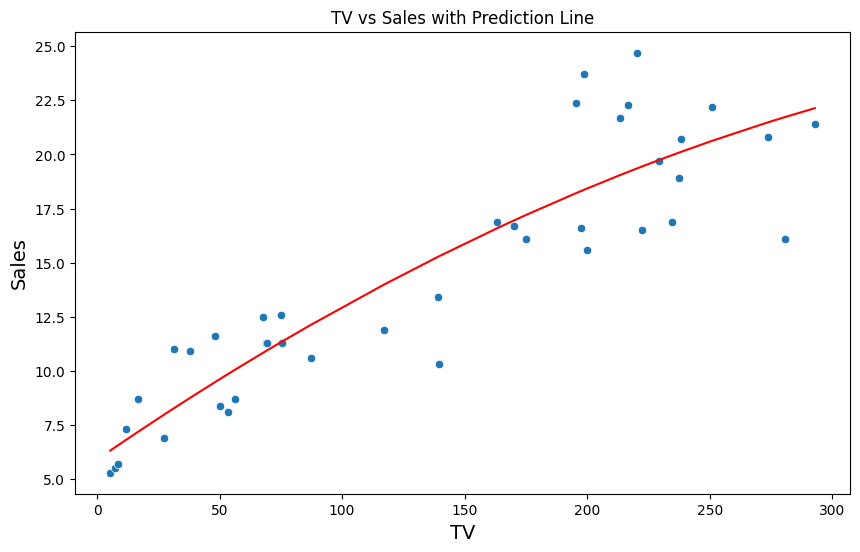

In [ ]:
draw_predictions(X_test, y_test, y_pred.ravel(), 'TV', 'Sales', 'TV vs Sales with Prediction Line')

Vemos que la curva se ajusta correctamente a los puntos del test, mejor que si usaramos una regresión logística normal con solo un coeficiente.

---

Ahora crearemos un modelo de `RandomForestRegressor`. Para ello usaremos la misma estrategia que hemos realizado otras veces:

* Primero usaremos `RandomizedSearchCV` para buscar los mejores hiperparámetros en un rango amplio.
* Luego usaremos `GridSearchCV` sobre el rango dado por `RandomizedSearchCV` para buscar más en profundidad en ese rango.

Realizamos el `RandomizedSearchCV`.

In [ ]:
X_tree = advertising.drop('Sales', axis=1)
y_tree = advertising['Sales']

X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree, y_tree, test_size=TEST_SIZE, random_state=SEED)

In [ ]:
param_random = {
    'n_estimators': np.arange(10, 101, 10),
    'max_depth': np.arange(2, 11),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11)
}

model_rf = RandomForestRegressor(random_state=SEED)
random_search = RandomizedSearchCV(model_rf, param_random, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=SEED)

random_search.fit(X_tree_train, y_tree_train)

print('Mejores parámetros: ', random_search.best_params_)


Mejores parámetros:  {'n_estimators': np.int64(100), 'min_samples_split': np.int64(2), 'min_samples_leaf': np.int64(2), 'max_depth': np.int64(8)}


Los mejores hiperparámetros para nuestro modelo usando `RandomizedSearchCV` son los siguientes:

* `n_estimators`: 100,
* `min_samples_split`: 2,
* `min_samples_leaf`: 2,
* `max_depth`: 8

Realizamos la búsqueda con `GridSearchCV` sobre el rango específico del `RandomizedSearchCV`.

In [ ]:
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90],
    'max_depth': [None, 2, 3, 4, 5, 7],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(model_rf, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_tree_train, y_tree_train)

print('Mejores parámetros: ', grid_search.best_params_)

Mejores parámetros:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 80}


En este caso, los mejores hiperparámetros proporcionados por `GridSearchCV` para nuestro modelo son los siguientes:

* `n_estimators`: 80,
* `min_samples_split`: 3,
* `min_samples_leaf`: 1,
* `max_depth`: `None`

Ahora, con estos hiperparámetros, creamos nuestro modelo.

In [ ]:
model_rf = RandomForestRegressor(n_estimators=80, min_samples_split=3, min_samples_leaf=1, random_state=SEED)
model_rf.fit(X_tree_train, y_tree_train)

RandomForestRegressor(min_samples_split=3, n_estimators=80, random_state=42)

Realizamos las métricas para evaluar nuestro modelo.

In [ ]:
y_pred_rf = model_rf.predict(X_tree_test)

print('MSE:', mean_squared_error(y_tree_test, y_pred_rf))
print('RMSE:', root_mean_squared_error(y_tree_test, y_pred_rf))
print('R2:', r2_score(y_tree_test, y_pred_rf))

MSE: 1.4713658559018907
RMSE: 1.2129987039984382
R2: 0.9523846770535065


Vemos que el R2 de este modelo es de 95.24%. Mucho mejor que el de regresión lineal.